<a href="https://colab.research.google.com/github/yadul6339/The-Sparks-Foundation-Internship/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [53]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df1.shape

(150, 6)

In [7]:
df1['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

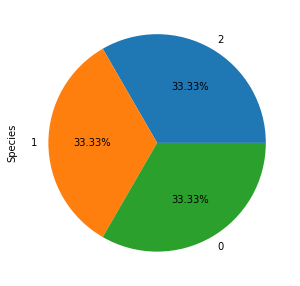

In [60]:
plt.figure(figsize=(10,5))
df1['Species'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [8]:
df1.isnull().sum

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df1 = df1.drop('Id',axis=1)
df1.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [18]:
df1['Species'] = df1['Species'].replace({'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2})
df1.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [19]:
x = df1.drop('Species',axis=1)
y = df1['Species']

In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [21]:
from sklearn.linear_model import LogisticRegression 
lor = LogisticRegression() 
lor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(lor.score(x_train,y_train))

0.9619047619047619


In [25]:
print(lor.score(x_test,y_test))

1.0


In [42]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
print(dtc.score(x_train,y_train))

1.0


In [49]:
print(dtc.score(x_test,y_test))

1.0


In [50]:
predicted = dtc.predict(x_test)


In [52]:
df2 = df(x_test)
df2['Predicted Values'] = predicted
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Values
73,6.1,2.8,4.7,1.2,2
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,1
78,6.0,2.9,4.5,1.5,2
76,6.8,2.8,4.8,1.4,2
